In [1]:
import pandas as pd

In [2]:
filename = '../../Sample_Data/Processed/roi.genresplitted.tsv'
df = pd.read_csv(filename, sep='\t')
df.head()

,tconst,name,date,prod_budget,domestic_gross,worldwide_gross,isAdult,startYear,runtimeMinutes,Action,...,Adult,War,Biography,Western,Sport,Music,News,Film-Noir,ROI_domestic,ROI_worldwide
0,tt4154796,Avengers: Endgame,2019,400000000,858373000,2797800564,0,2019,181,1,...,0,0,0,0,0,0,0,0,2.145933,6.994501
1,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,379000000,241063875,1045663875,0,2011,136,1,...,0,0,0,0,0,0,0,0,0.636052,2.759008
2,tt2395427,Avengers: Age of Ultron,2015,365000000,459005868,1403013963,0,2015,141,1,...,0,0,0,0,0,0,0,0,1.257550,3.843874
3,tt4154756,Avengers: Infinity War,2018,300000000,678815482,2048359754,0,2018,149,1,...,0,0,0,0,0,0,0,0,2.262718,6.827866
4,tt0974015,Justice League,2017,300000000,229024295,655945209,0,2017,120,1,...,0,0,0,0,0,0,0,0,0.763414,2.186484


In [3]:
df.columns

Index(['tconst', 'name', 'date', 'prod_budget', 'domestic_gross',
       'worldwide_gross', 'isAdult', 'startYear', 'runtimeMinutes', 'Action',
       'Adventure', 'Drama', 'Fantasy', 'Sci-Fi', 'Thriller', 'Animation',
       'Comedy', 'Family', 'Crime', 'Horror', 'History', 'Romance', 'Mystery',
       'Musical', 'Documentary', 'Adult', 'War', 'Biography', 'Western',
       'Sport', 'Music', 'News', 'Film-Noir', 'ROI_domestic', 'ROI_worldwide'],
      dtype='object')

In [33]:
with open('../../Sample_Data/Processed/genres.num.tsv', 'w') as f:
    for i in range(9, 33):
        f.write('{}\t{}\n'.format(df.columns[i], len(df[df[df.columns[i]]==1])))

In [4]:
df.startYear.describe()

count     4705
unique      94
top         \N
freq       444
Name: startYear, dtype: object

In [5]:
def set_to_none(value):
    if value == '\\N':
        return None
    else:
        return value

In [6]:
df['startYear'] = df['startYear'].apply(set_to_none)

In [7]:
df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce')

In [8]:
import numpy as np
df['startYear'] = df['startYear'].astype('Int64')

C:\Users\huiwe\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\huiwe\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


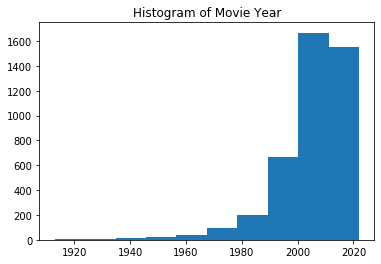

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(df.startYear)
plt.title('Histogram of Movie Year')
fig.savefig('../../Docs/Images/movie.year.png')

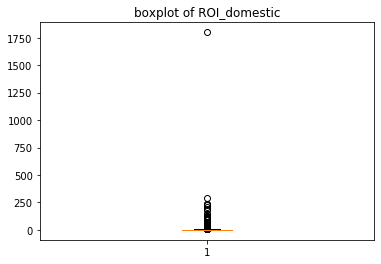

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.boxplot(df.ROI_domestic)
plt.title('boxplot of ROI_domestic')
fig.savefig('../../Docs/Images/roi.boxplot.before.png')

In [11]:
df = df[df['ROI_domestic'] <= 80]

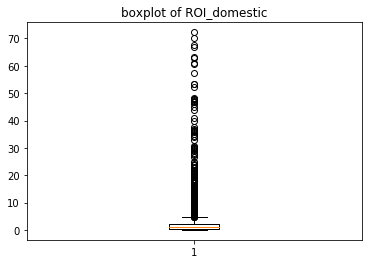

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.boxplot(df.ROI_domestic)
plt.title('boxplot of ROI_domestic')
fig.savefig('../../Docs/Images/roi.boxplot.after.png')

In [13]:
for i in range(9, 33):
    print()
    print('============================================================')
    print('Describing column {}'.format(df.columns[i]))
    print('--------------Domestic for {}------------------------'.format(df.columns[i]))
    print(df[df[df.columns[i]]==1].ROI_domestic.describe())
    print()
    print('--------------Worldwide for {}------------------------'.format(df.columns[i]))
    print(df[df[df.columns[i]]==1].ROI_worldwide.describe())
    print('============================================================')
    print()


Describing column Action
--------------Domestic for Action------------------------
count    1039.000000
mean        1.679867
std         3.408112
min         0.000107
25%         0.463583
50%         0.920841
75%         1.740312
max        60.680000
Name: ROI_domestic, dtype: float64

--------------Worldwide for Action------------------------
count    1039.000000
mean        3.940792
std        17.074745
min         0.000138
25%         0.964419
50%         2.081692
75%         3.644477
max       498.750000
Name: ROI_worldwide, dtype: float64


Describing column Adventure
--------------Domestic for Adventure------------------------
count    778.000000
mean       1.879952
std        3.504547
min        0.000120
25%        0.555019
50%        1.061606
75%        2.010632
max       61.001764
Name: ROI_domestic, dtype: float64

--------------Worldwide for Adventure------------------------
count    778.000000
mean       4.388799
std       18.705068
min        0.002616
25%        1.157545


Text(0.5, 1.0, 'boxplot of ROI_domestic in different genres')

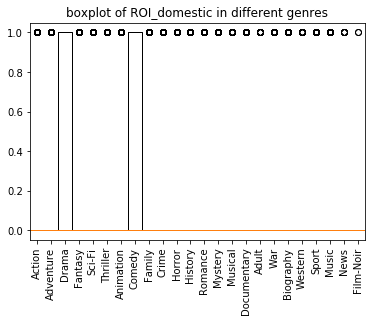

In [29]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=1)
for i in range(9, 33):
    ax.boxplot(df.iloc[:, i], positions = [i-8], widths = 1)
ax.set_xticklabels(df.columns[9:33], rotation=90)
plt.title('boxplot of ROI_domestic in different genres')
# fig.savefig('../../Docs/Images/roi.boxplots.png')

In [14]:
import statsmodels.api as sm

In [15]:
X = df.iloc[:, 9:33]
y_domestic = df['ROI_domestic']

X2 = sm.add_constant(X)
est = sm.OLS(y_domestic, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           ROI_domestic   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     4.748
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           1.79e-13
Time:                        22:05:03   Log-Likelihood:                -14225.
No. Observations:                4684   AIC:                         2.850e+04
Df Residuals:                    4659   BIC:                         2.866e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6763      0.249     10.760      

C:\Users\huiwe\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [16]:
y_worldwide = df['ROI_worldwide']

est = sm.OLS(y_worldwide, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          ROI_worldwide   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.776
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           7.80e-06
Time:                        22:05:03   Log-Likelihood:                -17799.
No. Observations:                4684   AIC:                         3.565e+04
Df Residuals:                    4659   BIC:                         3.581e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.0845      0.533      7.657      